In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset, create a dataframe, asign columns names and target
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Rename columns
name_map = {
    'sepal length (cm)': 'sepal_length', 
    'sepal width (cm)': 'sepal_width', 
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}

iris_data.rename(columns=name_map, inplace=True)

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Shape of data
iris_data.shape

(150, 5)

In [6]:
# Summary statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Target distribution
iris_data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

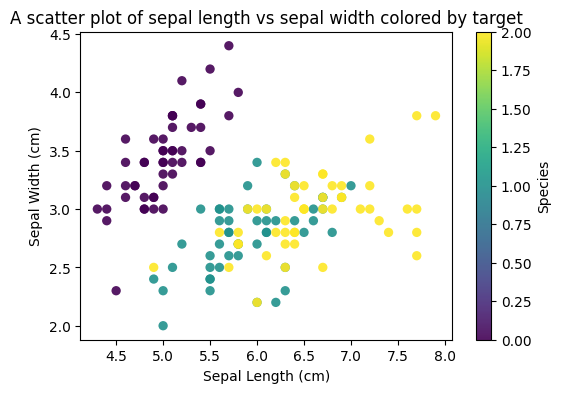

In [8]:
# Plot a scatter plot of sepal length vs sepal width colored by target
plt.figure(figsize=(6, 4))

plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], s=45, c=iris_data['target'], cmap='viridis', alpha=0.9, marker='o', edgecolors='none')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species')
plt.title('A scatter plot of sepal length vs sepal width colored by target')
plt.show()

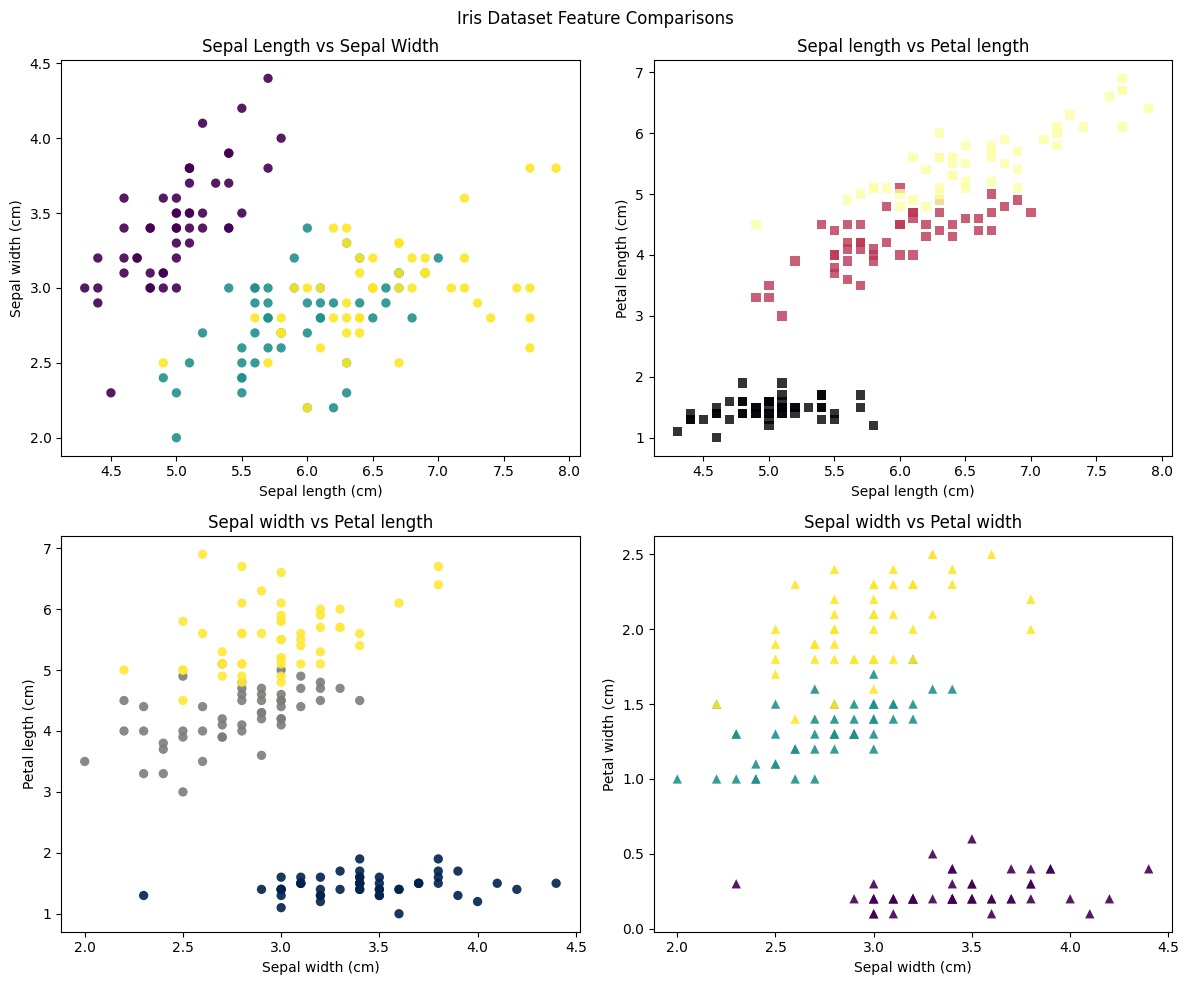

In [9]:
# Subplots (multiple plots side by side)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sepal legth vs sepal width
axes[0, 0].scatter(iris_data['sepal_length'], iris_data['sepal_width'], s=45, c=iris_data['target'], cmap='viridis', alpha=0.9, marker='o', edgecolors='none')

# Labels
axes[0, 0].set_xlabel('Sepal length (cm)')
axes[0, 0].set_ylabel('Sepal width (cm)')
axes[0, 0].set_title('Sepal Length vs Sepal Width')

# Sepal legth vs petal length
axes[0, 1].scatter(iris_data['sepal_length'], iris_data['petal_length'], s=45, c=iris_data['target'], cmap='inferno', marker='s', edgecolors='none', alpha=0.8)

# Labels
axes[0, 1].set_xlabel('Sepal length (cm)')
axes[0, 1].set_ylabel('Petal length (cm)')
axes[0, 1].set_title('Sepal length vs Petal length')

# Sepal width vs petal length
axes[1, 0].scatter(iris_data['sepal_width'], iris_data['petal_length'], s=45, c=iris_data['target'], alpha=0.9, cmap='cividis', edgecolors='none', marker='o')

# Labels
axes[1, 0].set_xlabel('Sepal width (cm)')
axes[1, 0].set_ylabel('Petal legth (cm)')
axes[1, 0].set_title('Sepal width vs Petal length')

# Sepal width vs Petal width
axes[1, 1].scatter(iris_data['sepal_width'], iris_data['petal_width'], s=45, c=iris_data['target'], alpha=0.9, edgecolors='none', cmap='viridis', marker='^')

# Labels
axes[1, 1].set_xlabel('Sepal width (cm)')
axes[1, 1].set_ylabel('Petal width (cm)')
axes[1, 1].set_title('Sepal width vs Petal width')

fig.suptitle('Iris Dataset Feature Comparisons')

plt.tight_layout()

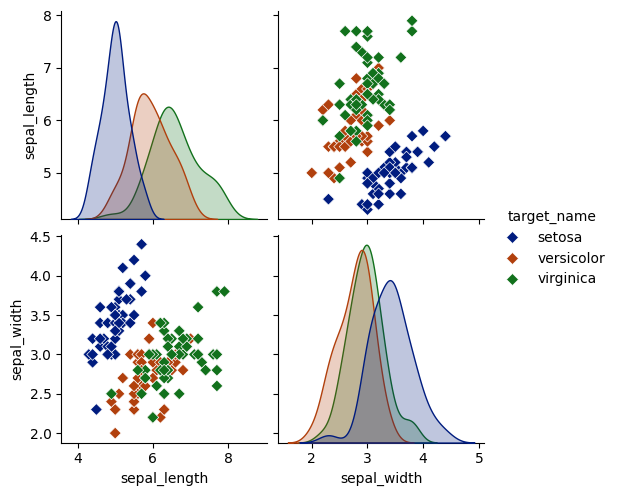

In [10]:
# Scatter plot of the iris dataset
columns = ['sepal_length', 'sepal_width']
target_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
iris_data['target_name'] = iris_data['target'].map(target_map)

sns.pairplot(iris_data, kind='scatter', vars=columns, hue='target_name', palette='dark', diag_kind='kde', markers='D')
plt.show()

In [13]:
duplicates = iris_data[iris_data.duplicated(keep=False)]
print(duplicates)


     sepal_length  sepal_width  petal_length  petal_width  target target_name
101           5.8          2.7           5.1          1.9       2   virginica
142           5.8          2.7           5.1          1.9       2   virginica


In [14]:
row_101 = iris_data.loc[101]
row_142 = iris_data.loc[142]

comparison = row_101.compare(row_142)
print(comparison)


Empty DataFrame
Columns: [self, other]
Index: []
